Physics 165 - Fall 2021 

Lab 3 - Lorentz force on charged particle, Practice with ODEs <br>
Solution


<font color='red'>Author: RJ Young

___________________________________________________________
Background:

The force on a charged particle in an electric and magnetic field is
given by the Lorentz Force Law:

$\vec{F}=q \; (\vec{E} + \vec{v}\times\vec{B}) \;\;\;\;\;\;\;\;\; (1)$ 

where $q$ is the particle charge, $\vec{v}$ is the velocity, $\vec{E}$ is the electric field and $\vec{B}$ is the magnetic field. The quantity $\vec{v}\times\vec{B}$ is a vector cross-product.

Using Newton's law $m\vec{a}=\vec{F}$ and assuming non-relativistic velocity (i.e. $v \ll c$) we can write the equations of motion as ODEs:

$\vec{a} = \frac{1}{m}\vec{F} = \frac{q}{m}(\vec{E} + \vec{v}\times\vec{B}) \;\;\;\;\;\;\;\;\; (2)$ 

Combining equations (1) and (2) doing the cross product and writing in $(x,y,z)$ component form we have the 3 coupled second order ODEs:

$\ddot{x} = \frac{q}{m}(E_x+(v_y B_z-v_z B_y))$ <br>
$\ddot{y} = \frac{q}{m}(E_y+(v_z B_x-v_x B_z))$ <br>
$\ddot{z} = \frac{q}{m}(E_z+(v_x B_y-v_y B_x))$

As we did in homework 6 and the class examples, we can break the 2nd oder ODEs into coupled 1st order ODEs. In this case we have 3 coupled 2nd order ODEs to be written as 6 couple 1st order ODEs. Then we implement these in python by using the notation:

$y_1=x$<br>
$y_2=\dot{x} = \dot{y_1}$<br>
$y_3=y$ <br>
$y_4=\dot{y} = \dot{y_3}$<br>
$y_5=z$ <br>
$y_6=\dot{z} = \dot{y_5}$<br>

Then the 6 coupled 1st order ODEs are:

$\dot{y_1} = \dot{x}=y_2$ <br>
$\dot{y_2} = \ddot{x} = \frac{q}{m}(E_x+(v_y B_z-v_z B_y))$<br>
$\dot{y_3} = y_4$<br>
$\dot{y_4} = \ddot{y} = \frac{q}{m}(E_y+(v_z B_x-v_x B_z))$<br> 
$\dot{y_5} = y_6$<br>
$\dot{y_6} = \ddot{z} = \frac{q}{m}(E_z+(v_x B_y-v_y B_x))$<br> 

Putting this in array form for use with odeint in python:

$\;\;\;\; \mathbf{y} = \left[ \begin{array}{c} y_1 \\ y_2 \\y_3 \\y_4 
\\y_5 \\ y_6 \end{array} \right]
\;\;\;\;\;\;\;\; \frac{d\mathbf{y}}{dt} = 
\left[ \begin{array}{c} dy_1/dt \\ dy_2/dt \\dy_3/dt \\dy_4/dt
\\dy_5/dt \\ dy_6/dt \end{array} \right] =
\left[ \begin{array}{c} y_2 \\ \frac{q}{m}(E_x+(v_y B_z-v_z B_y)) \\ y_4 \\ \frac{q}{m}(E_y+(v_z B_x-v_x B_z)) \\
y_6 \\ \frac{q}{m}(E_z+(v_x B_y-v_y B_x))
\end{array} \right]$

where the second equation for the 1st derivative is what you write as your user function "def F(y,t):" that odeint calls. (see examples from class on ELMS)

_____________________________________________________________________
Part 1:

Assume that the fields $\vec{E}$ and $\vec{B}$ are constant over the space and time. That is they don't depend on position or time, and are just static uniform fields.

Write the user defined function for the first derivatives above with
parameters $(q,m,E,B)$ for the charge, mass, electric field and magnetic field respectively. $q$ and $m$ are scalars, while $E$ and $B$ are a 3-component array:

to start with, assign the following values (not in the function, but in the program that will call the function!)

$q = 1.6 \times 10^{-19} C$ <br>
$m = 9.11 \times 10^{-31} kg$ <br>
$\vec{E}=(0,0,50) \; V/m$ <br>
$\vec{B}=(0,0,.005) \; T$ <br>

Set the intial velocity of the particle by giving it 1000 eV of kinetic energy. 

$T = 1000 \;eV$

This is the kinetic energy $T$ a particle of charge e accelerated by 1000 volts gains. Hint: To convert eV to Joules multiply by the electron charge $1.6\times10^{-19}$ From this you can get the intial speed $v_0$ of the particle.

$v_o=\sqrt{2 T/m}$

Set the initial values for the $y_0$ array:

$y_0=[x_0,v_{x0},y_0,v_{y0},z_0,v_{z0}] = [0,.707*v_0,0,.707*v_0,0,0]$

select a time array for the problem of

$0 \lt t \lt 5\times10^{-8}s$

Call 'odeint' to get the returned trajectories (like this)

Traj=odeint(Lorentz_Force,y0,t,args=(charge,mass,E_field,B_field))

plot the trajectory for (x,y,z) over the time range using
plotting with projection='3d' (as in examples from class or online)

If you like you can then play around with $\vec{E}$ and $\vec{B}$ and see how the trajectory changes.


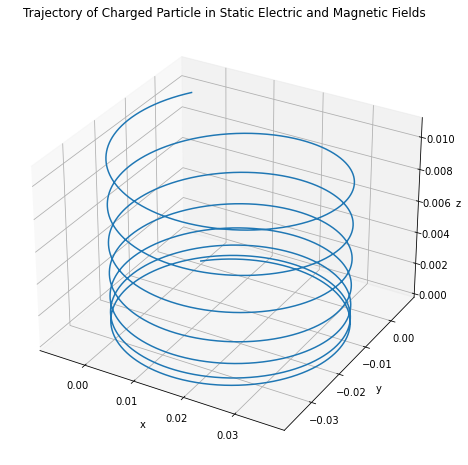

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

q = 1.6e-19
m = 9.11e-31
E = np.array([0, 0, 50])
B = np.array([0, 0, 0.005])

def F(y,t):
    dy = [0,0,0,0,0,0]
    dy[0] = y[1]
    dy[1] = (q/m)*(E[0] + (y[3]*B[2] - y[5]*B[1]))
    dy[2] = y[3]
    dy[3] = (q/m)*(E[1] + (y[5]*B[0] - y[1]*B[2]))
    dy[4] = y[5]
    dy[5] = (q/m)*(E[2] + (y[1]*B[1] - y[3]*B[0]))
    
    return dy

t_min = 0.0
t_max = 5e-8
dt = 5e-12
t = np.linspace(t_min,t_max + dt, 10000)

T = 1000
v_0 = np.sqrt((2*T*q/m))
y_0 = np.array([0, 0.707*v_0, 0, 0.707*v_0, 0, 0])

Traj = odeint(F,y_0,t)
plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.plot3D(Traj[:,0], Traj[:,2], Traj[:,4])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Trajectory of Charged Particle in Static Electric and Magnetic Fields')
plt.show()

________________________________________________________________
Part 2:

for this part set the parameters

$mass = 9.11 \times 10^{-31} kg$ <br>
$\vec{E}=(0,3000,0) \; V/m$ <br>
$\vec{B}=(0,0,0) \; T$ <br>

$T = 1000 \; eV$

$0 \lt t \lt .15meter/v_0$

In this problem we are investigating how we can use the Lorentz force to build a device (see presentation from class on Lab 3) to separate a particle of charge 1e from 2e. That is:

$q = 1.6 \times 10^{-19} C$  versus $q = 3.2 \times 10^{-19} C$ <br>

Our hypothetical device will use an 'electron gun' of 1000v to accelerate the charged particle to a kinetic energy

$T=1000 \; eV$ heading directly along the +x-axis at a startting position of (x,y,z)=(0,0,0)

Our device will try to separate the 2 charges by using the electorstaic field above and detecting the y-coordinate of the particle at x=0.1m For example, we could have small aperatures with particle detectors along the y direction at x=0.1m.

However in building our 'electron gun' to give the particle 1000 eV of kinetic energy there may be uncertainty in the exact collimation (i.e. direction) and exact kinetic energy:

1) run a monte carlo with 10,000 trials for each of the 2 charges above <br>
2) because of limits in collimation, for each trial assume the theta direction from directly along the x-axis, has a normal distribution with $\sigma=1^\circ$ You can play around with this value varying it say from $1^\circ-1.5^\circ$<br>
Then: $v_{x0} = v_0 \cos(\theta)$ and $v_{y0} = v_0 \sin(\theta)$ 
and $v_{z0}=0$<br>
3) show an x-y plot with the trajectories for 10-20 trials for each charge (color coded) on the same plot <br>
4) show a single histogram of the y-coordinate at x=0.1m with the 10,000 trials for each charge (color coded). 

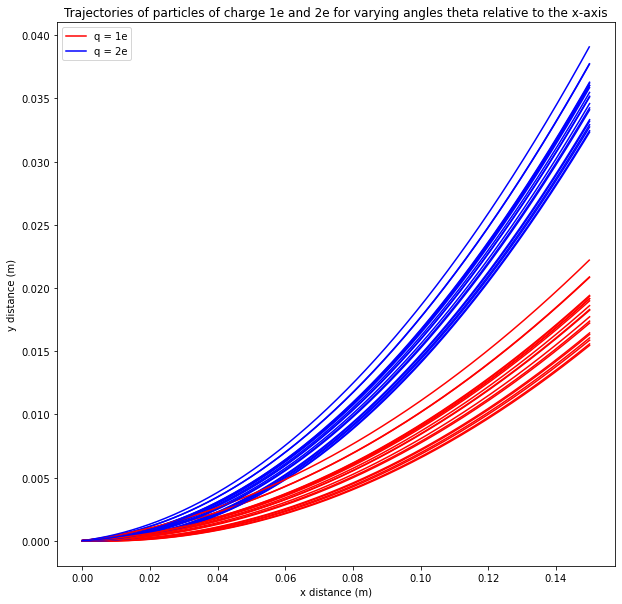

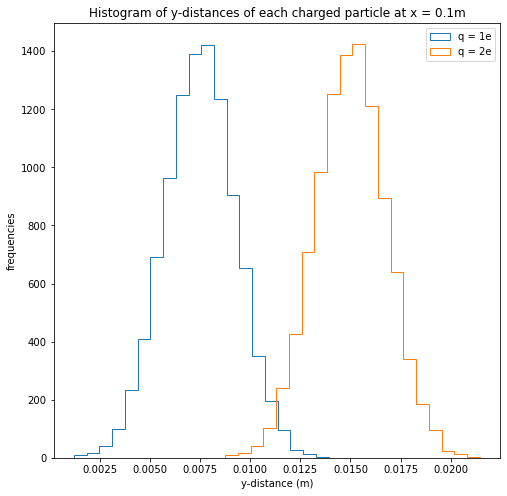

In [16]:
n_trials = 10000

m = 9.11e-31
E = np.array([0, 3000, 0])
B = np.array([0, 0, 0])

T = 1000
v_0 = np.sqrt((2*T*(1.6e-19))/m)

t_min = 0
t_max = 0.15/v_0
dt = t_max/5000
t = np.arange(t_min, t_max, dt)


sigma_theta = 1
theta = sigma_theta*np.random.randn(n_trials)
theta_rad = theta*np.pi/180

traj_1e_x = np.zeros((np.size(t),20))
traj_1e_y = np.zeros((np.size(t),20))

traj_2e_x = np.zeros((np.size(t),20))
traj_2e_y = np.zeros((np.size(t),20))

hist1 = np.zeros(10000)
hist2 = np.zeros(10000)

plt.figure(figsize = (10,10))
for i in range(n_trials):
    y_0 = np.array([0, v_0*np.cos(theta_rad[i]),0,v_0*np.sin(theta_rad[i]),0,0])
    
    q = 1.6e-19
    traj1 = odeint(F, y_0, t)
    
    q = 3.2e-19
    traj2 = odeint(F, y_0, t)

    x1 = np.transpose(traj1[:,0])
    y1 = np.transpose(traj1[:,2])
    
    x2 = np.transpose(traj2[:,0])
    y2 = np.transpose(traj2[:,2])
    
    x1_10cm = (x1 >= 0.1)
    ind1 = np.argmax(x1_10cm)
    
    x2_10cm = (x2 >= 0.1)
    ind2 = np.argmax(x2_10cm)
    
    hist1[i] = y1[ind1]
    hist2[i] = y2[ind2]

    if (i%500 == 0):
        k = i%499
        for l in range(np.size(t)):
            traj_1e_x[l,k-1] = traj1[l,0]    
            traj_1e_y[l,k-1] = traj1[l,2] 
            
            traj_2e_x[l,k-1] = traj2[l,0] 
            traj_2e_y[l,k-1] = traj2[l,2]
    

plt.plot(traj_1e_x[:,0], traj_1e_y[:,0], "r", label = 'q = 1e')
plt.plot(traj_2e_x[:,0], traj_2e_y[:,0], "b", label = 'q = 2e')

for m in range(1,20):
    line2d_1 = plt.plot(traj_1e_x[:,m], traj_1e_y[:,m], "r")
    line2d_2 = plt.plot(traj_2e_x[:,m], traj_2e_y[:,m], "b")

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('Trajectories of particles of charge 1e and 2e for varying angles theta relative to the x-axis')

plt.figure(figsize = (8,8))
plt.hist(hist1,20,histtype = 'step',label = 'q = 1e')
plt.hist(hist2,20,histtype = 'step',label = 'q = 2e')
plt.legend()
plt.xlabel('y-distance (m)')
plt.ylabel('frequencies')
plt.title('Histogram of y-distances of each charged particle at x = 0.1m')
plt.show()

_______________________________________________________________
Observations: <br>
What I can see above is that in varying the angle at which the particles are shot out, which is related to the collimation, the two charged particles are deflected further and further away from each other as the x-distance increases, but not by a significantly large distance. The seperation at the x = 0.1m is about 0.008m, or about 8mm, on average. The seperation in each charge's individual trajectories appears to be a vertical distribution when varying the deflection angle.



________________________________________________________________

Part 3:

Do the same thing as above but now keep the angle at 0 degrees but
vary the initial kinetic energy of $T=1000 \;eV$ with a sigma of $75\;eV$

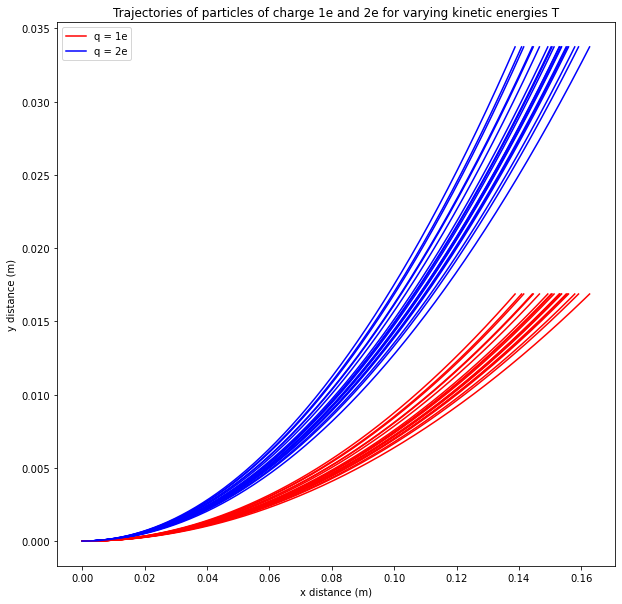

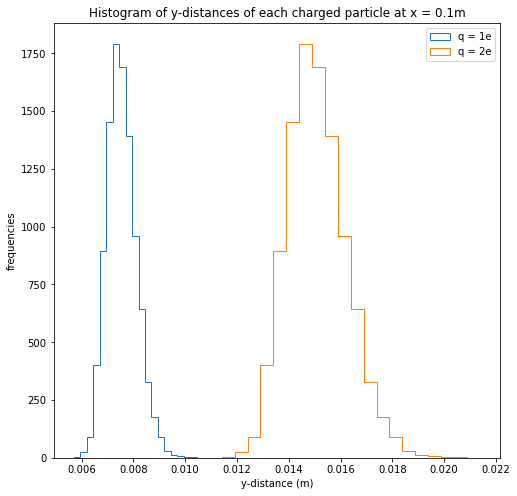

In [17]:
n_trials = 10000

m = 9.11e-31
E = np.array([0, 3000, 0])
B = np.array([0, 0, 0])

t_min = 0
t_max = 0.15/np.sqrt((2*1000*(1.6e-19)/m))
dt = t_max/5000
t = np.arange(t_min, t_max, dt)

sigma_T = 75
T = 1000 + sigma_T*np.random.randn(n_trials)

v_0 = np.sqrt((2*T*(1.6e-19))/m)

traj_1e_x = np.zeros((np.size(t),20))
traj_1e_y = np.zeros((np.size(t),20))

traj_2e_x = np.zeros((np.size(t),20))
traj_2e_y = np.zeros((np.size(t),20))

hist1 = np.zeros(10000)
hist2 = np.zeros(10000)

plt.figure(figsize = (10,10))
for i in range(n_trials):
    y_0 = np.array([0,v_0[i],0,0,0,0])
    
    q = 1.6e-19
    traj1 = odeint(F, y_0, t)
    
    q = 3.2e-19
    traj2 = odeint(F, y_0, t)

    x1 = np.transpose(traj1[:,0])
    y1 = np.transpose(traj1[:,2])
    
    x2 = np.transpose(traj2[:,0])
    y2 = np.transpose(traj2[:,2])
    
    x1_10cm = (x1 >= 0.1)
    ind1 = np.argmax(x1_10cm)
    
    x2_10cm = (x2 >= 0.1)
    ind2 = np.argmax(x2_10cm)
    
    hist1[i] = y1[ind1]
    hist2[i] = y2[ind2]
    
    if (i%500 == 0):
        k = i%499
        for l in range(np.size(t)):
            traj_1e_x[l,k-1] = traj1[l,0]    
            traj_1e_y[l,k-1] = traj1[l,2] 
            
            traj_2e_x[l,k-1] = traj2[l,0] 
            traj_2e_y[l,k-1] = traj2[l,2]
    

plt.plot(traj_1e_x[:,0], traj_1e_y[:,0], "r", label = 'q = 1e')
plt.plot(traj_2e_x[:,0], traj_2e_y[:,0], "b", label = 'q = 2e')

for m in range(1,20):
    line2d_1 = plt.plot(traj_1e_x[:,m], traj_1e_y[:,m], "r")
    line2d_2 = plt.plot(traj_2e_x[:,m], traj_2e_y[:,m], "b")

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('Trajectories of particles of charge 1e and 2e for varying kinetic energies T')

plt.figure(figsize = (8,8))
plt.hist(hist1,20,histtype = 'step',label = 'q = 1e')
plt.hist(hist2,20,histtype = 'step',label = 'q = 2e')
plt.legend()
plt.xlabel('y-distance (m)')
plt.ylabel('frequencies')
plt.title('Histogram of y-distances of each charged particle at x = 0.1m')
plt.show()


_______________________________________________________________
Observations: <br>
At the x = 0.1m point, we see about the same seperation on average as seen in Part 3 when only the angle of deflection was randomly varied, however we can see that as the x-distance increases the particles appear to diverge much more rapidly. Also, the seperation caused by the kinetic energy variation on the individual trajectories appears to be more horizontal rather than vertical. Lastly, the seperation between each individual trajectory has a much tighter spread/distribution, as seen in the histogram.


________________________________________________________________

Part 4:

Now do the same again, b ut varying both simultaneously.


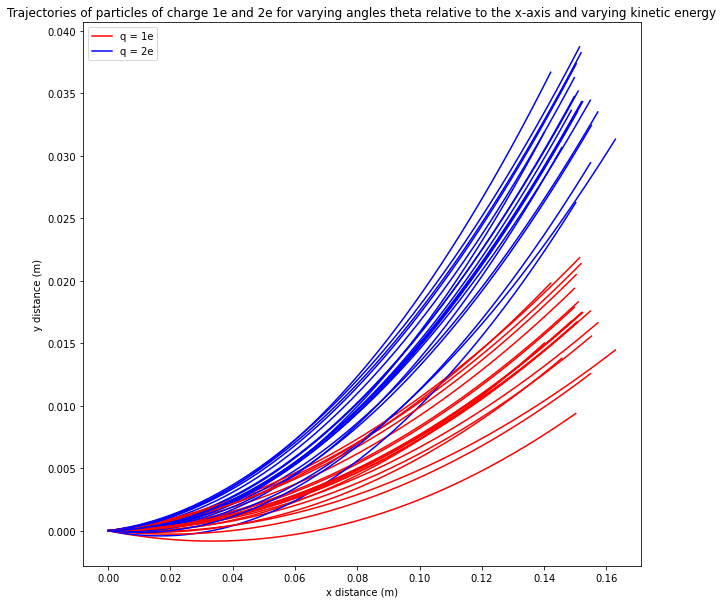

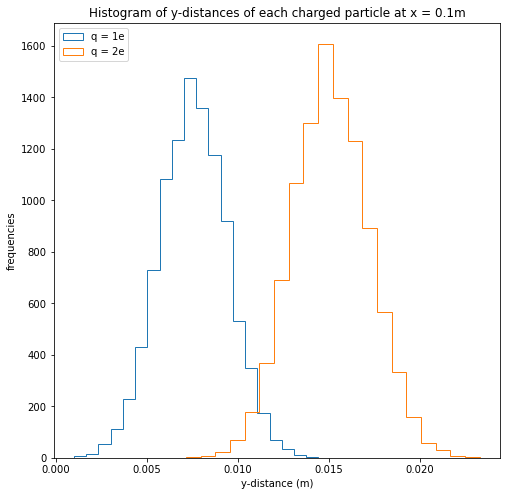

In [18]:
n_trials = 10000

m = 9.11e-31
E = np.array([0, 3000, 0])
B = np.array([0, 0, 0])

sigma_T = 75
T = 1000 + sigma_T*np.random.randn(n_trials)

v_0 = np.sqrt((2*T*1.6*10**(-19))/m)

t_min = 0
t_max = 0.15/np.sqrt((2*1000*(1.6e-19))/m)
dt = t_max/5000
t = np.arange(t_min, t_max, dt)

sigma_theta = 1
theta = sigma_theta*np.random.randn(n_trials)
theta_rad = theta*np.pi/180

traj_1e_x = np.zeros((np.size(t),20))
traj_1e_y = np.zeros((np.size(t),20))

traj_2e_x = np.zeros((np.size(t),20))
traj_2e_y = np.zeros((np.size(t),20))

hist1 = np.zeros(10000)
hist2 = np.zeros(10000)

plt.figure(figsize = (10,10))
for i in range(n_trials):
    y_0 = np.array([0, v_0[i]*np.cos(theta_rad[i]),0,v_0[i]*np.sin(theta_rad[i]),0,0])
    
    q = 1.6e-19
    traj1 = odeint(F, y_0, t)
    
    q = 3.2e-19
    traj2 = odeint(F, y_0, t)

    x1 = np.transpose(traj1[:,0])
    y1 = np.transpose(traj1[:,2])
    
    x2 = np.transpose(traj2[:,0])
    y2 = np.transpose(traj2[:,2])
    
    x1_10cm = (x1 >= 0.1)
    ind1 = np.argmax(x1_10cm)
    
    x2_10cm = (x2 >= 0.1)
    ind2 = np.argmax(x2_10cm)
    
    hist1[i] = y1[ind1]
    hist2[i] = y2[ind2]
    
    if (i%500 == 0):
        k = i%499
        for l in range(np.size(t)):
            traj_1e_x[l,k-1] = traj1[l,0]    
            traj_1e_y[l,k-1] = traj1[l,2] 
            
            traj_2e_x[l,k-1] = traj2[l,0] 
            traj_2e_y[l,k-1] = traj2[l,2]
    

plt.plot(traj_1e_x[:,0], traj_1e_y[:,0], "r", label = 'q = 1e')
plt.plot(traj_2e_x[:,0], traj_2e_y[:,0], "b", label = 'q = 2e')

for m in range(1,20):
    line2d_1 = plt.plot(traj_1e_x[:,m], traj_1e_y[:,m], "r")
    line2d_2 = plt.plot(traj_2e_x[:,m], traj_2e_y[:,m], "b")

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('Trajectories of particles of charge 1e and 2e for varying angles theta relative to the x-axis and varying kinetic energy')

plt.figure(figsize = (8,8))
plt.hist(hist1,20,histtype = 'step',label = 'q = 1e')
plt.hist(hist2,20,histtype = 'step',label = 'q = 2e')
plt.legend()
plt.xlabel('y-distance (m)')
plt.ylabel('frequencies')
plt.title('Histogram of y-distances of each charged particle at x = 0.1m')
plt.show()


_______________________________________________________________
Observations: <br>
The seperation distance at the x = 0.1m point is still about the same in this case. With regards to the different trajectories of each particle, we see that the distribution of each charge's individual trajectories appears to be much more random rather than solely a horizontal spread or a vertical spread seen in the previous cases.


________________________________________________________________

Part 5:

Now do the same but set the fields as:

$\vec{E}=(0,3000,0) \; V/m$ <br>
$\vec{B}=(0.0033,0,0) \; T$ <br>



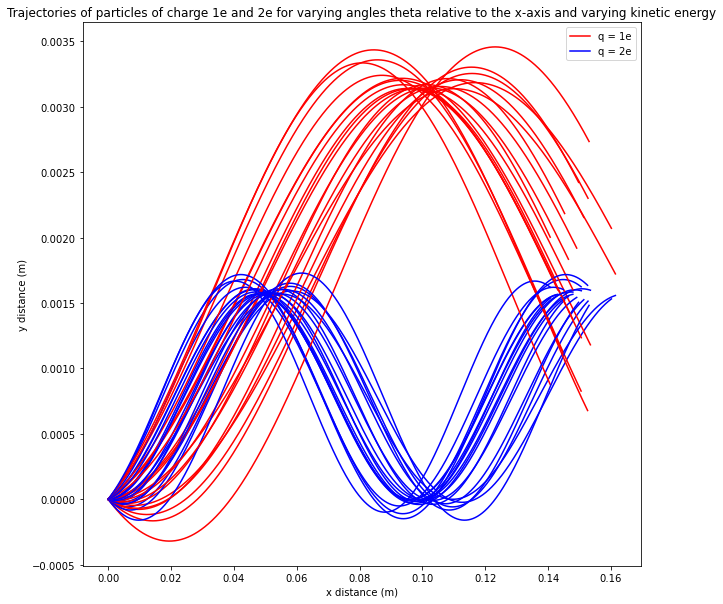

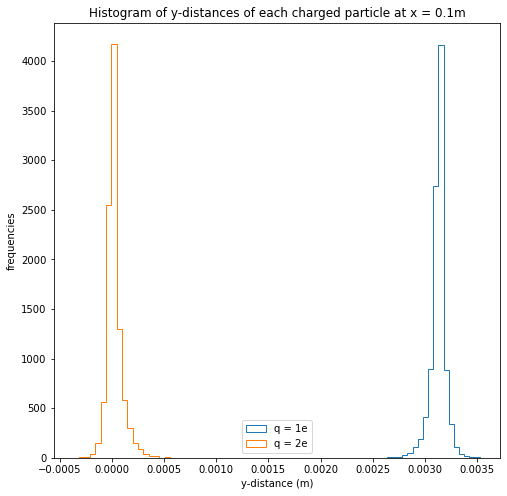

In [19]:
n_trials = 10000

m = 9.11e-31
E = np.array([0, 3000, 0])
B = np.array([0.0033, 0, 0])

sigma_T = 75
T = 1000 + sigma_T*np.random.randn(n_trials)

v_0 = np.sqrt((2*T*(1.6e-19))/m)

t_min = 0
t_max = 0.15/np.sqrt((2*1000*(1.6e-19))/m)
dt = t_max/5000
t = np.arange(t_min, t_max, dt)

sigma_theta = 1
theta = sigma_theta*np.random.randn(n_trials)
theta_rad = theta*np.pi/180

traj_1e_x = np.zeros((np.size(t),20))
traj_1e_y = np.zeros((np.size(t),20))

traj_2e_x = np.zeros((np.size(t),20))
traj_2e_y = np.zeros((np.size(t),20))

hist1 = np.zeros(10000)
hist2 = np.zeros(10000)

plt.figure(figsize = (10,10))
for i in range(n_trials):
    y_0 = np.array([0, v_0[i]*np.cos(theta_rad[i]),0,v_0[i]*np.sin(theta_rad[i]),0,0])
    
    q = 1.6e-19
    traj1 = odeint(F, y_0, t)
    
    q = 3.2e-19
    traj2 = odeint(F, y_0, t)

    x1 = np.transpose(traj1[:,0])
    y1 = np.transpose(traj1[:,2])
    
    x2 = np.transpose(traj2[:,0])
    y2 = np.transpose(traj2[:,2])
    
    x1_10cm = (x1 >= 0.1)
    ind1 = np.argmax(x1_10cm)
    
    x2_10cm = (x2 >= 0.1)
    ind2 = np.argmax(x2_10cm)
    
    hist1[i] = y1[ind1]
    hist2[i] = y2[ind2]
    
    if (i%500 == 0):
        k = i%499
        for l in range(np.size(t)):
            traj_1e_x[l,k-1] = traj1[l,0]    
            traj_1e_y[l,k-1] = traj1[l,2] 
            
            traj_2e_x[l,k-1] = traj2[l,0] 
            traj_2e_y[l,k-1] = traj2[l,2]
    

plt.plot(traj_1e_x[:,0], traj_1e_y[:,0], "r", label = 'q = 1e')
plt.plot(traj_2e_x[:,0], traj_2e_y[:,0], "b", label = 'q = 2e')

for m in range(1,20):
    line2d_1 = plt.plot(traj_1e_x[:,m], traj_1e_y[:,m], "r")
    line2d_2 = plt.plot(traj_2e_x[:,m], traj_2e_y[:,m], "b")

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('Trajectories of particles of charge 1e and 2e for varying angles theta relative to the x-axis and varying kinetic energy')

plt.figure(figsize = (8,8))
plt.hist(hist1,20,histtype = 'step',label = 'q = 1e')
plt.hist(hist2,20,histtype = 'step',label = 'q = 2e')
plt.legend()
plt.xlabel('y-distance (m)')
plt.ylabel('frequencies')
plt.title('Histogram of y-distances of each charged particle at x = 0.1m')
plt.show()

_______________________________________________________________
Observations: <br>
We now see that when setting a nonzero, static magnetic field along the x-axis in this case, the two charge particles become much more distinctly seperated at the x = 0.1m point as seen in the histogram. It also appears that the trajectories of each particle overlap/intersect at a distinct point around the x = 0.1m point.
    

Part 6:

Now make a '3d' plot and show a single trajectory for the 2 charges at the nominal kinetic energy of $1000 eV$ and angle of $0^\circ$

But, only plot for $0 \le x\le 0.1m$

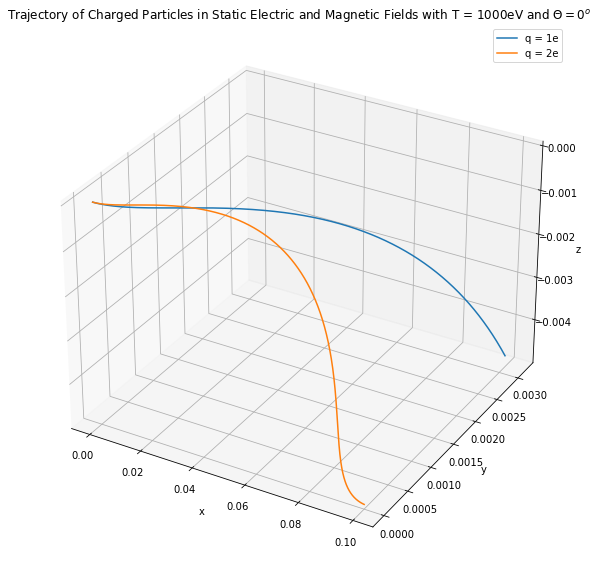

In [27]:
def F(y,t):
    dy = [0,0,0,0,0,0]
    dy[0] = y[1]
    dy[1] = (q/m)*(E[0] + (y[3]*B[2] - y[5]*B[1]))
    dy[2] = y[3]
    dy[3] = (q/m)*(E[1] + (y[5]*B[0] - y[1]*B[2]))
    dy[4] = y[5]
    dy[5] = (q/m)*(E[2] + (y[1]*B[1] - y[3]*B[0]))
    
    return dy

t_min = 0.0
t_max = 5e-8
dt = 5e-12
t = np.linspace(t_min,t_max + dt, 10000)

T = 1000
v_0 = np.sqrt((2*T*(1.6e-19))/m)
y_0 = np.array([0, v_0, 0, 0, 0, 0])

q = 1.6e-19
m = 9.11e-31
E = np.array([0, 3000, 0])
B = np.array([0.0033, 0, 0])

Traj1 = odeint(F,y_0,t)

q = 3.2e-19
Traj2 = odeint(F,y_0,t)

x1 = Traj1[:,0]
y1 = Traj1[:,2]
z1 = Traj1[:,4]

x1_10cm = (x1 >= 0.1)
ind1 = np.argmax(x1_10cm)

x2 = Traj2[:,0]
y2 = Traj2[:,2]
z2 = Traj2[:,4]

x2_10cm = (x2 >= 0.1)
ind2 = np.argmax(x2_10cm)

plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.plot3D(x1[:ind1], y1[:ind1], z1[:ind1], label = 'q = 1e')
ax.plot3D(x2[:ind2], y2[:ind2], z2[:ind2], label = 'q = 2e')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Trajectory of Charged Particles in Static Electric and Magnetic Fields with T = 1000eV and $\Theta = 0^{o}$')
plt.legend()
plt.tight_layout()
plt.show()

___________________________________________________________
Summary and conclusions <br>

What we see is that introducing a magnetic field to the previous configuration results in a distinct seperation of the two particles after a certain distance, i.e. around x = 0.1m away. Thus, this configuration of the electric and magnetic fields with our electron gun device allows us to cleanly seperate the two different charge particles. A static magnetic field along the x-axis and a static electrif field along the y-axis combined with an optimal 0 degree deflection angle and shooting the particles out with a kinetic energy of 1000 eV produces this desired seperation. I conclude that this general setup results in the desired seperation, and can be applied in areas such as mass spectroscopy where seperation of sources is needed.








_____________________________________________________________